In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_csv('Final.csv')

In [3]:
lstm.sample()

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (°C),Total Snow (cm),Total Precip (mm),Min Temp (°C),MeanTemp,Heat Deg Days (°C),Cool Deg Days (°C),Longitude (x),Latitude (y)
436,2016-05-01,Alberta,28.653231,5.394796,52.82976,4579,Barrhead,26.3,4.218182,0.0,-0.1,13.1,4.9,0.0,-114.45,54.09


# Breton Construction 

In [5]:
lstm_Construction_breton = lstm[lstm['Station Name'] == 'Breton'][['Date', 'Construction']]
lstm_Construction_breton.set_index('Date', inplace=True)
lstm_Construction_breton.index = pd.to_datetime(lstm_Construction_breton.index)

In [6]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_Construction_breton['Construction'] = scaler.fit_transform(lstm_Construction_breton[['Construction']])


In [7]:
lstm_Construction_breton['Construction'].head()

Date
2001-01-01    0.020213
2001-02-01    0.013107
2001-03-01    0.023948
2001-04-01    0.010728
2001-05-01    0.021525
Name: Construction, dtype: float64

In [8]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [9]:
sequence_length = 11
X, y = create_sequences(lstm_Construction_breton['Construction'].values, sequence_length)


In [10]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [11]:
n_steps =11
n_features =1

In [12]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

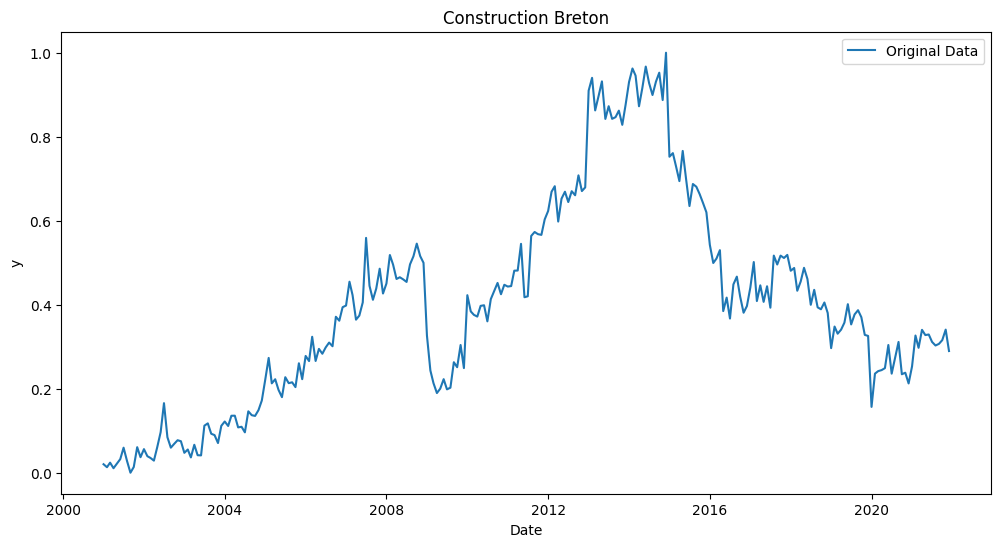

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_Construction_breton.index, lstm_Construction_breton['Construction'], label='Original Data')
plt.title('Construction Breton')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
#Scaling the data
scaler = MinMaxScaler()
lstm_Construction_breton[['Construction']] = scaler.fit_transform(lstm_Construction_breton[['Construction']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_Construction_breton) * 0.8)
train, test = lstm_Construction_breton[:train_size], lstm_Construction_breton[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Construction'].values, sequence_length)
X_test, y_test = create_sequences(test['Construction'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 6ms/step


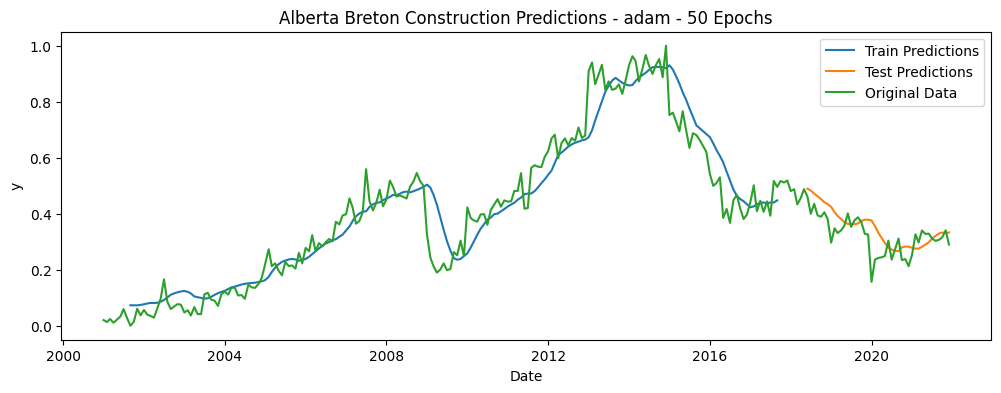

Metrics for adam - 50 Epochs:
Train MSE: 0.1315077655949681
Test MSE: 0.00917357519811592
Train MAE: 0.054513881364781885
Test MAE: 0.04685677755728732
Train RMSE: 0.07612311815554439
Test RMSE: 0.060560783669248004
2/2 [==============================] - 0s 7ms/step


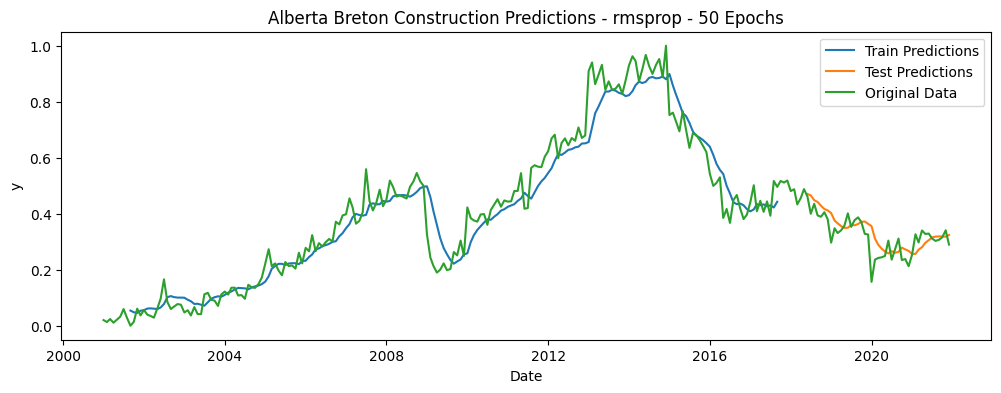

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.12867519731997396
Test MSE: 0.008080775049861162
Train MAE: 0.04723440872130055
Test MAE: 0.03578874501948481
Train RMSE: 0.06573479484890753
Test RMSE: 0.04900239540403591
2/2 [==============================] - 0s 12ms/step


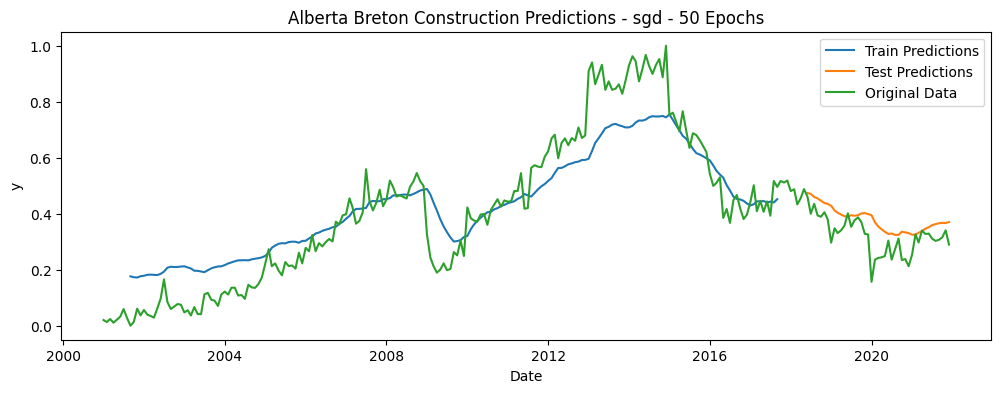

Metrics for sgd - 50 Epochs:
Train MSE: 0.09709141534073061
Test MSE: 0.009463440089581988
Train MAE: 0.0861150055451866
Test MAE: 0.05977069024600516
Train RMSE: 0.10888718630792966
Test RMSE: 0.07442210847210852
2/2 [==============================] - 0s 5ms/step


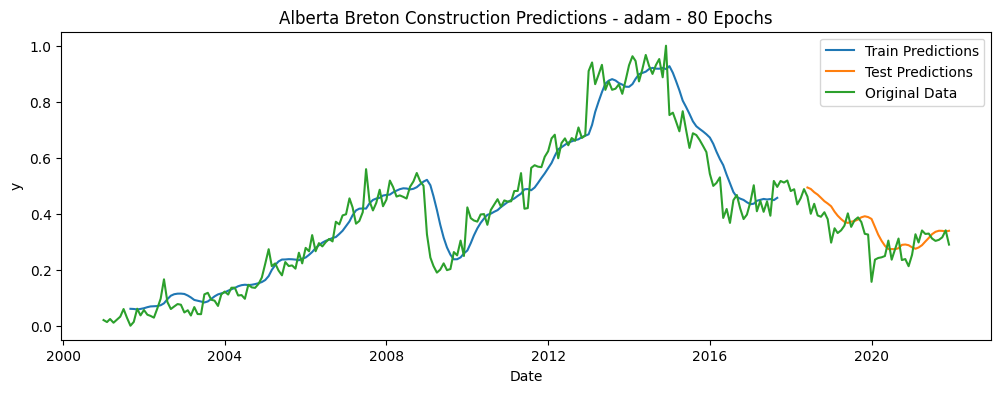

Metrics for adam - 80 Epochs:
Train MSE: 0.1328573582851677
Test MSE: 0.00954263665281704
Train MAE: 0.04908107656614278
Test MAE: 0.048002550443336164
Train RMSE: 0.06989590439253414
Test RMSE: 0.06188672542711153
2/2 [==============================] - 0s 8ms/step


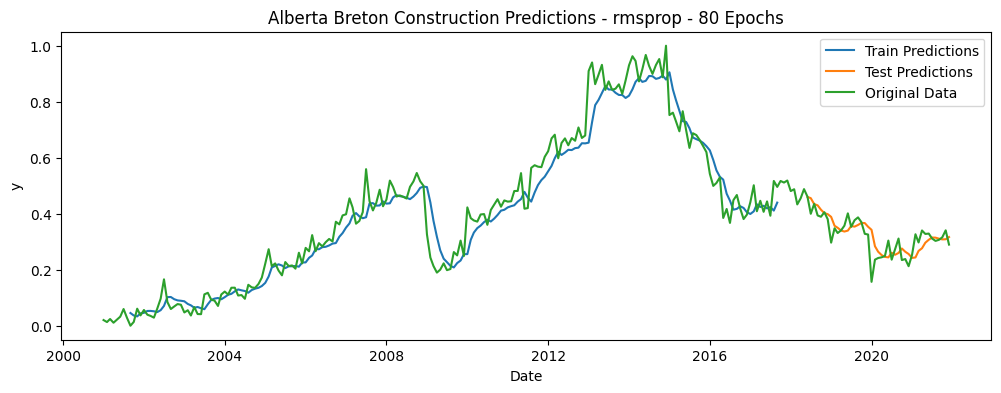

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.13027098412423974
Test MSE: 0.00783581205741724
Train MAE: 0.044772899818850236
Test MAE: 0.030858478495772782
Train RMSE: 0.061787178943678876
Test RMSE: 0.044820548282959775
2/2 [==============================] - 0s 9ms/step


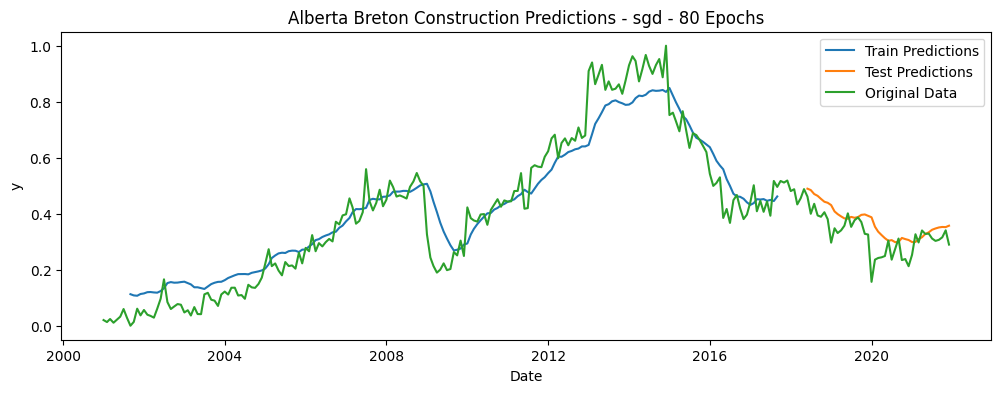

Metrics for sgd - 80 Epochs:
Train MSE: 0.11476211663915216
Test MSE: 0.00943378512857514
Train MAE: 0.06102821135230437
Test MAE: 0.05183329175488504
Train RMSE: 0.07861579117283715
Test RMSE: 0.06655100171003306
2/2 [==============================] - 0s 1ms/step


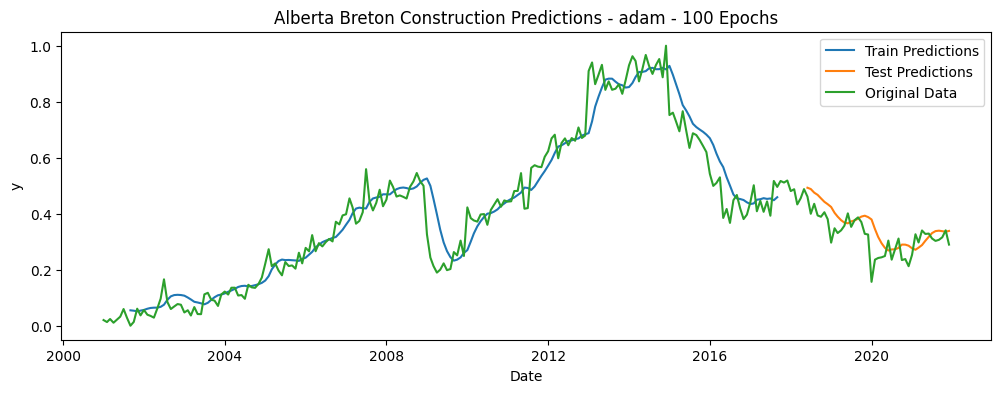

Metrics for adam - 100 Epochs:
Train MSE: 0.1338116443747271
Test MSE: 0.009483401019108412
Train MAE: 0.046817122092468556
Test MAE: 0.04666834759929305
Train RMSE: 0.06685959111664598
Test RMSE: 0.060432158147773855
2/2 [==============================] - 0s 9ms/step


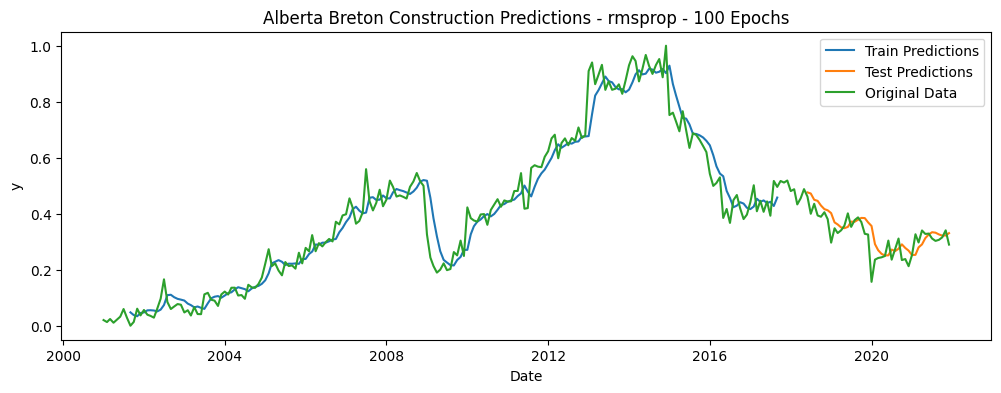

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.1333633505700635
Test MSE: 0.008405145926130887
Train MAE: 0.040690543748750016
Test MAE: 0.03457270283539159
Train RMSE: 0.057662642692738436
Test RMSE: 0.04851863116505131
2/2 [==============================] - 0s 0s/step


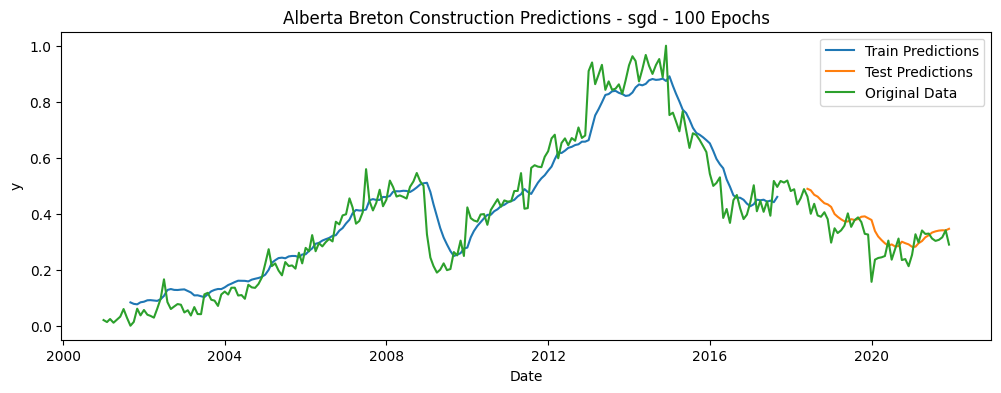

Metrics for sgd - 100 Epochs:
Train MSE: 0.12373393633271342
Test MSE: 0.009036110062113195
Train MAE: 0.051177922466578624
Test MAE: 0.045796048963353674
Train RMSE: 0.06938140371994042
Test RMSE: 0.059809868871490715
2/2 [==============================] - 0s 14ms/step


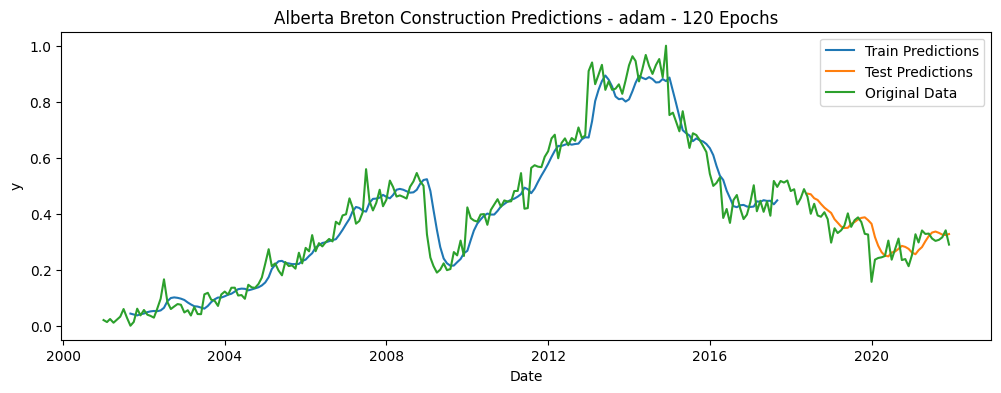

Metrics for adam - 120 Epochs:
Train MSE: 0.13033787234475722
Test MSE: 0.008509833823355606
Train MAE: 0.042552265990576495
Test MAE: 0.03786554134046657
Train RMSE: 0.06058588912412466
Test RMSE: 0.05158829173657058
2/2 [==============================] - 0s 4ms/step


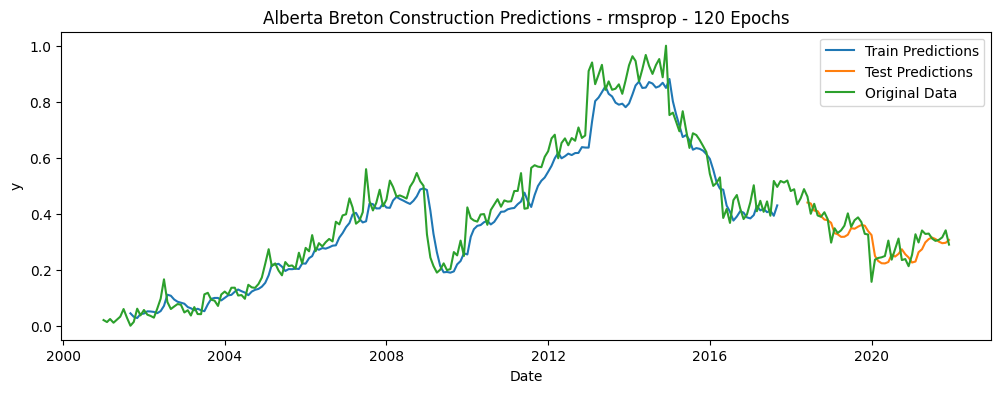

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.1275365787283385
Test MSE: 0.007701802610952034
Train MAE: 0.04729528134878427
Test MAE: 0.03161475490965471
Train RMSE: 0.06351699505355692
Test RMSE: 0.0436171270665104
2/2 [==============================] - 0s 5ms/step


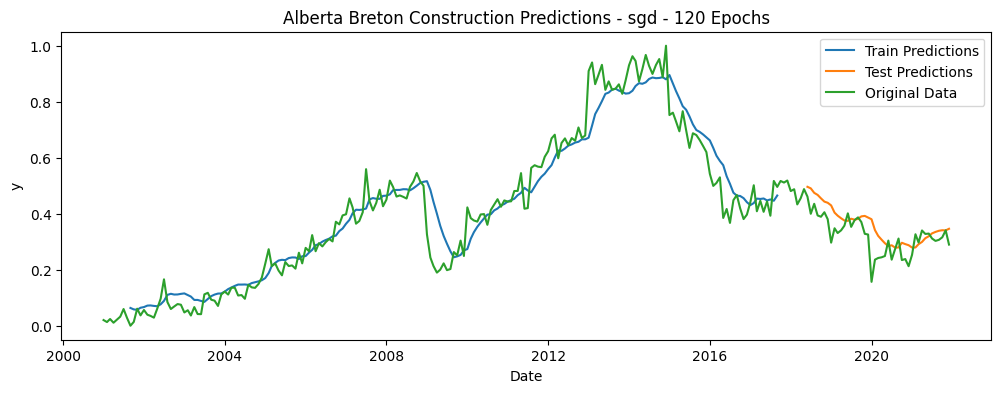

Metrics for sgd - 120 Epochs:
Train MSE: 0.12757026409972563
Test MSE: 0.009502678114447183
Train MAE: 0.04888279363711471
Test MAE: 0.047597146772235914
Train RMSE: 0.0687789184815571
Test RMSE: 0.06160556991268294


In [15]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_Construction_breton.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_Construction_breton.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_Construction_breton.index, lstm_Construction_breton['Construction'], label='Original Data')
        plt.title(f'Alberta Breton Construction Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Construction'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Construction'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Construction'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Construction'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# Stavely Transportation

In [16]:
lstm_transportation_stavely = lstm[lstm['Station Name'] == 'Stavely'][['Date', 'Transportation']]
lstm_transportation_stavely.set_index('Date', inplace=True)
lstm_transportation_stavely.index = pd.to_datetime(lstm_transportation_stavely.index)

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Scaling the Data
scaler = MinMaxScaler()
lstm_transportation_stavely['Transportation'] = scaler.fit_transform(lstm_transportation_stavely[['Transportation']])


In [19]:
lstm_transportation_stavely['Transportation'].head()


Date
2001-01-01    0.062439
2001-02-01    0.134910
2001-03-01    0.123395
2001-04-01    0.074132
2001-05-01    0.078088
Name: Transportation, dtype: float64

In [20]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [21]:
sequence_length = 11
X, y = create_sequences(lstm_transportation_stavely['Transportation'].values, sequence_length)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [24]:
n_steps =11
n_features =1

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [26]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Text(0, 0.5, 'y')

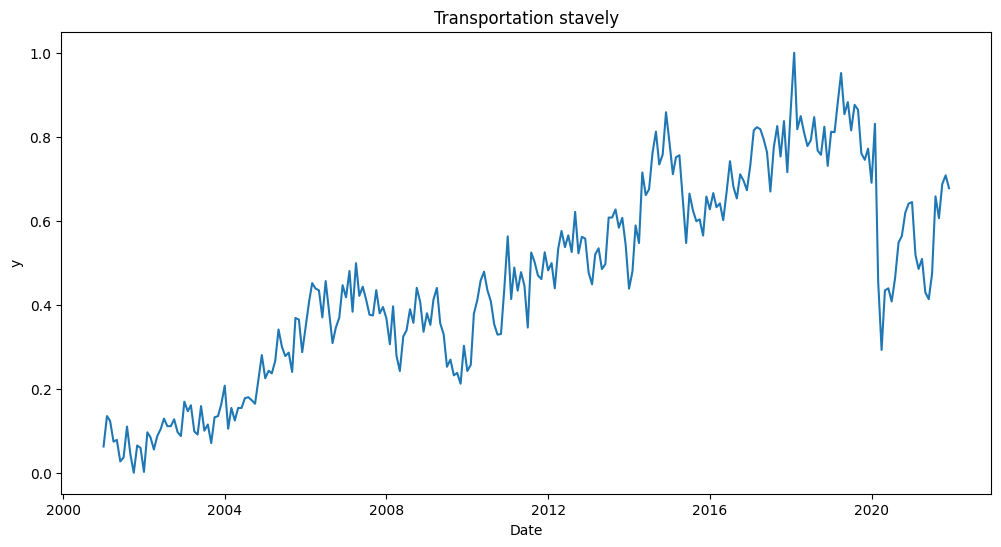

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_transportation_stavely.index, lstm_transportation_stavely['Transportation'], label='Original Data')
plt.title('Transportation stavely')
plt.xlabel('Date')
plt.ylabel('y')

In [28]:
#Scaling the data
scaler = MinMaxScaler()
lstm_transportation_stavely[['Transportation']] = scaler.fit_transform(lstm_transportation_stavely[['Transportation']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_transportation_stavely) * 0.8)
train, test = lstm_transportation_stavely[:train_size], lstm_transportation_stavely[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 8  # Adjust based on your data

X_train, y_train = create_sequences(train['Transportation'].values, sequence_length)
X_test, y_test = create_sequences(test['Transportation'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


2/2 [==============================] - 0s 6ms/step


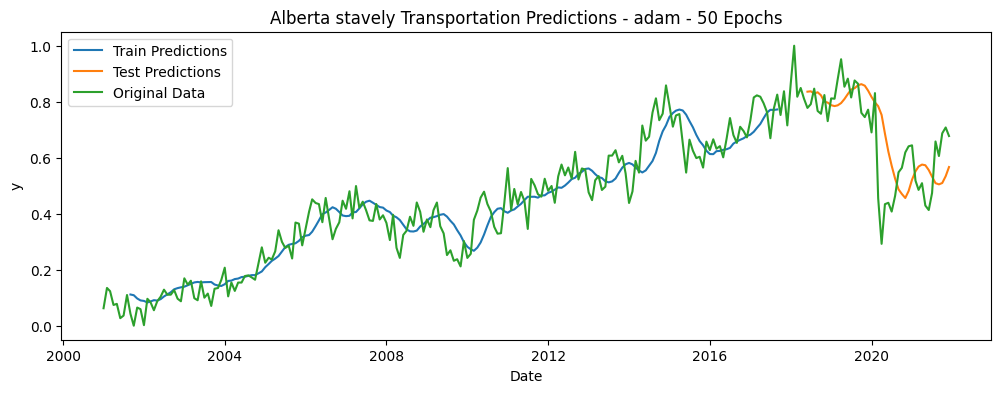

Metrics for adam - 50 Epochs:
Train MSE: 0.08019346738138171
Test MSE: 0.04891431756537558
Train MAE: 0.05276304743738791
Test MAE: 0.10548463559859668
Train RMSE: 0.06865109493046616
Test RMSE: 0.13604843520462265
2/2 [==============================] - 0s 4ms/step


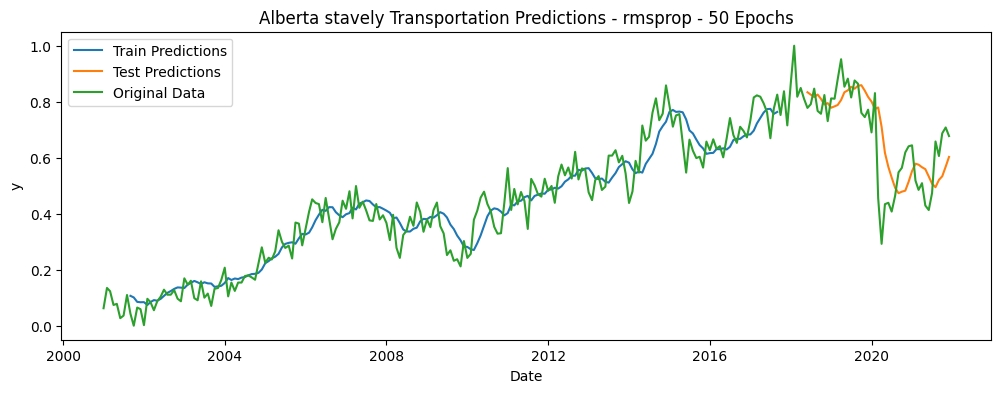

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.08058599974989054
Test MSE: 0.04793049163634876
Train MAE: 0.04882609483833205
Test MAE: 0.09291363135758482
Train RMSE: 0.06292015670626734
Test RMSE: 0.12007667080818496
2/2 [==============================] - 0s 6ms/step


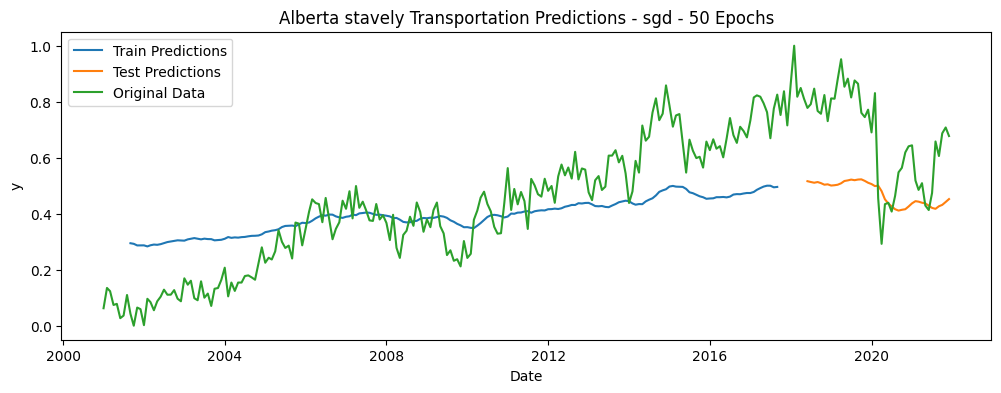

Metrics for sgd - 50 Epochs:
Train MSE: 0.047706511952634825
Test MSE: 0.06715276707378491
Train MAE: 0.12801053485485844
Test MAE: 0.20829200456228933
Train RMSE: 0.1549065228343322
Test RMSE: 0.23956769954803867
2/2 [==============================] - 0s 5ms/step


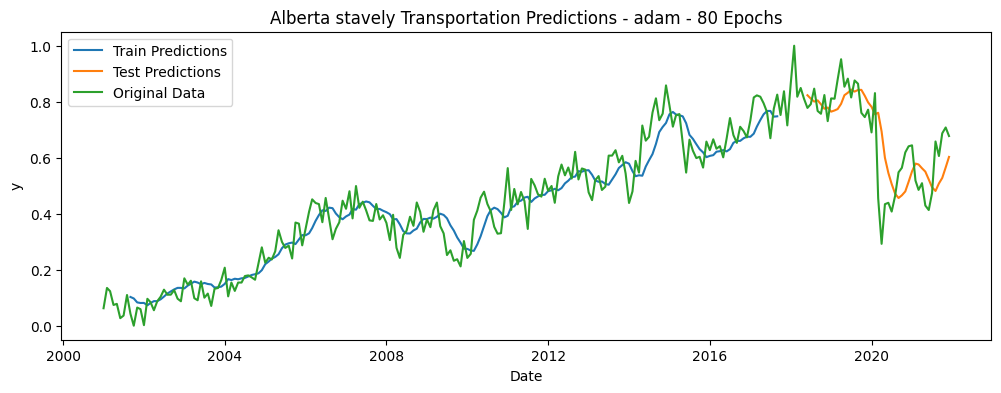

Metrics for adam - 80 Epochs:
Train MSE: 0.07975199495516279
Test MSE: 0.04705383596506988
Train MAE: 0.04897111025540477
Test MAE: 0.09063517796870535
Train RMSE: 0.06314632807472663
Test RMSE: 0.11662002818502391
2/2 [==============================] - 0s 6ms/step


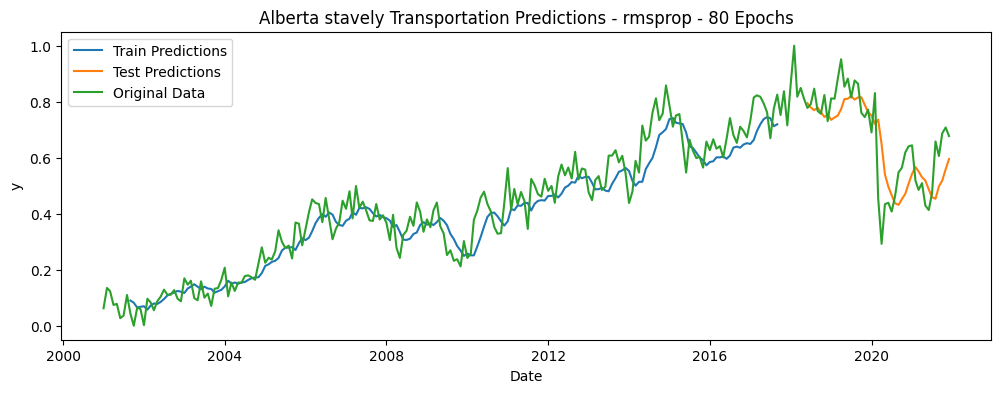

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.07889705848660136
Test MSE: 0.0472178805841899
Train MAE: 0.0516483052632722
Test MAE: 0.08642218397705606
Train RMSE: 0.06592364115560871
Test RMSE: 0.11200680675453298
2/2 [==============================] - 0s 5ms/step


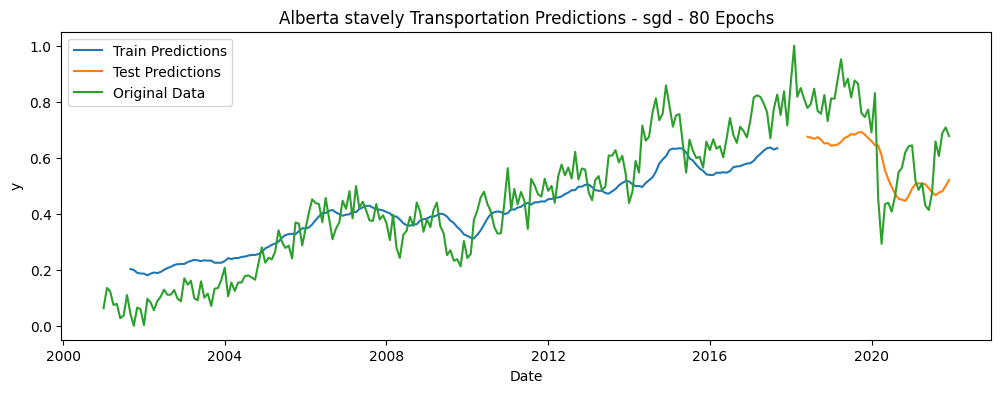

Metrics for sgd - 80 Epochs:
Train MSE: 0.05967677365936226
Test MSE: 0.04295780298369342
Train MAE: 0.08122450043508746
Test MAE: 0.1312967833867681
Train RMSE: 0.09758514619637469
Test RMSE: 0.15042093445746169
2/2 [==============================] - 0s 5ms/step


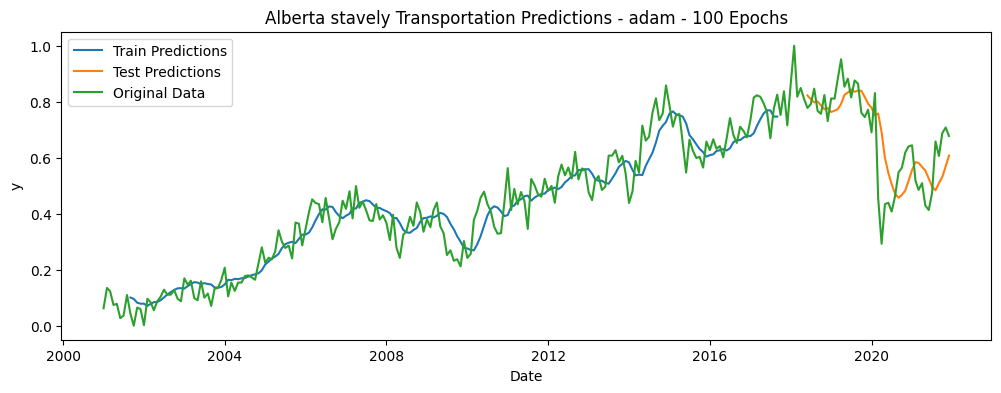

Metrics for adam - 100 Epochs:
Train MSE: 0.08020139032312884
Test MSE: 0.046483599198462566
Train MAE: 0.04878879481927804
Test MAE: 0.09000950524018901
Train RMSE: 0.06289596196786486
Test RMSE: 0.11579341796299342
2/2 [==============================] - 0s 5ms/step


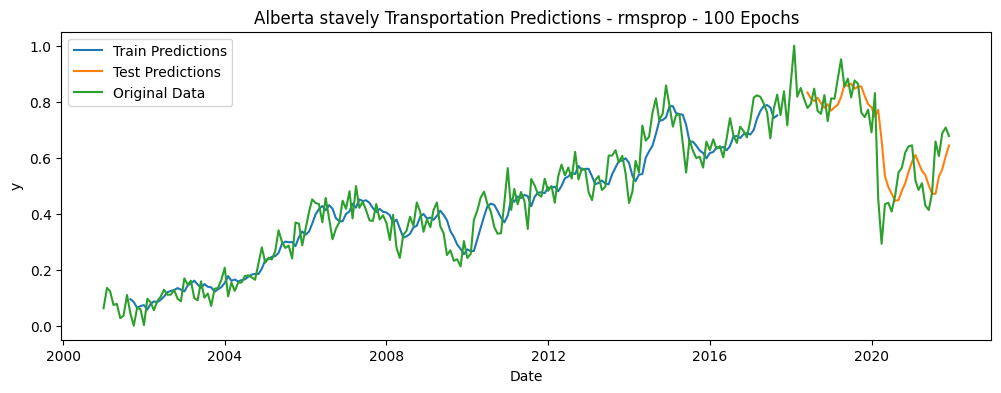

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.08204267372800038
Test MSE: 0.04886883301253635
Train MAE: 0.04548552596602263
Test MAE: 0.07944241459435714
Train RMSE: 0.05836340885506118
Test RMSE: 0.10569159453259108
2/2 [==============================] - 0s 5ms/step


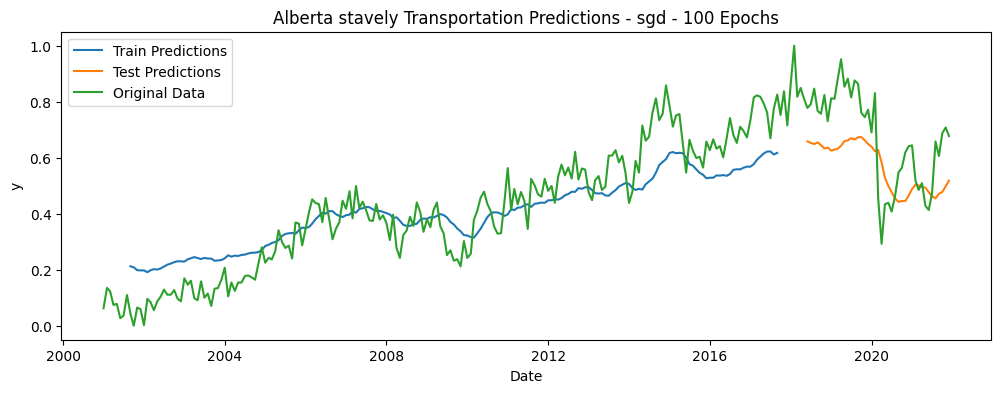

Metrics for sgd - 100 Epochs:
Train MSE: 0.05789039885780642
Test MSE: 0.044749439652264425
Train MAE: 0.08579708365278244
Test MAE: 0.13789124881420034
Train RMSE: 0.10280756002781236
Test RMSE: 0.1566785691123918
2/2 [==============================] - 0s 5ms/step


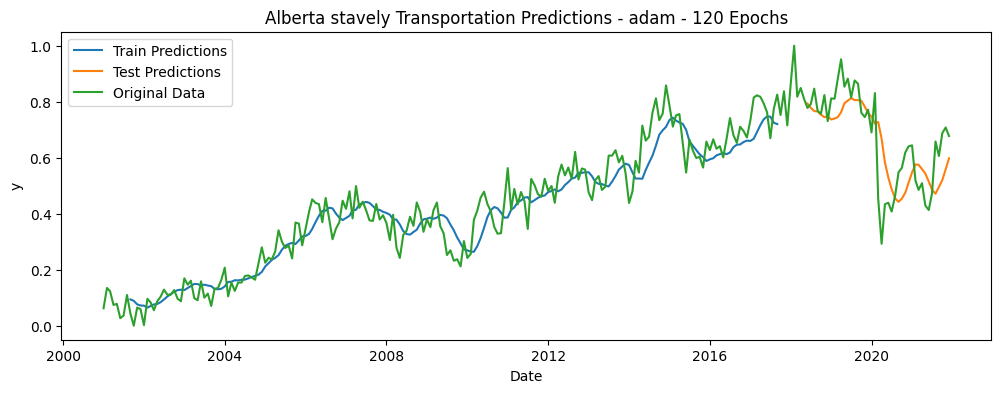

Metrics for adam - 120 Epochs:
Train MSE: 0.07878834480123585
Test MSE: 0.044388709273971004
Train MAE: 0.05054379914819898
Test MAE: 0.09039041218584502
Train RMSE: 0.06491479020592959
Test RMSE: 0.11592969865280789
2/2 [==============================] - 0s 6ms/step


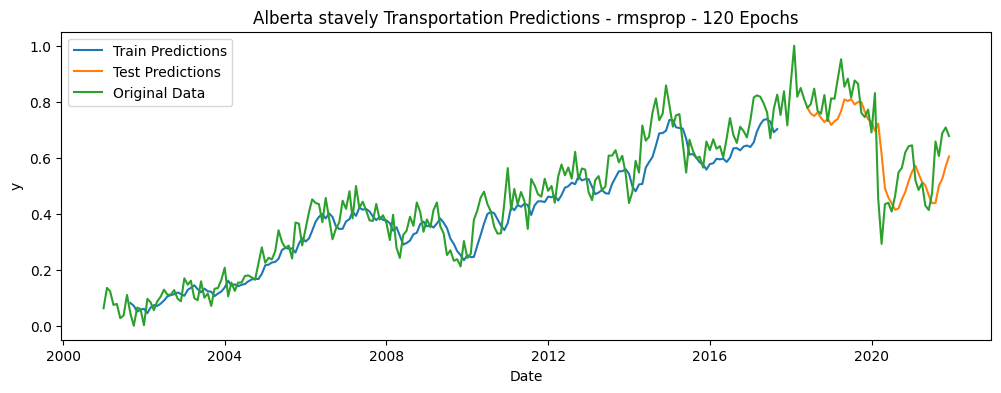

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.07909142108348387
Test MSE: 0.04762636709688547
Train MAE: 0.052928388645055
Test MAE: 0.0843882784125237
Train RMSE: 0.06717875974998937
Test RMSE: 0.10930374199980288
2/2 [==============================] - 0s 6ms/step


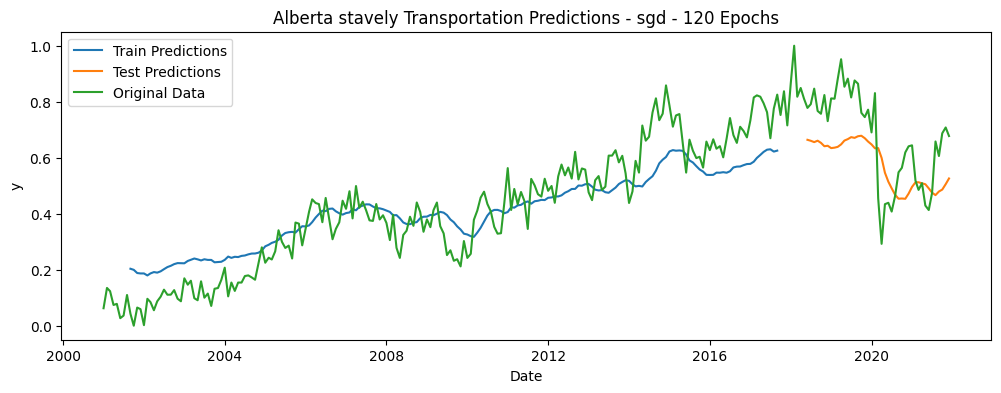

Metrics for sgd - 120 Epochs:
Train MSE: 0.05911298149981668
Test MSE: 0.042727671895266564
Train MAE: 0.08197114342092887
Test MAE: 0.1343447452150886
Train RMSE: 0.09845263887196018
Test RMSE: 0.1532093558466349


In [29]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_transportation_stavely.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_transportation_stavely.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_transportation_stavely.index, lstm_transportation_stavely['Transportation'], label='Original Data')
        plt.title(f'Alberta stavely Transportation Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Transportation'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Transportation'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Transportation'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Transportation'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')

# Milk River Agriculture

In [30]:
lstm_agriculture_Milkriver = lstm[lstm['Station Name'] == 'Milk River'][['Date', 'Agriculture']]
lstm_agriculture_Milkriver.set_index('Date', inplace=True)
lstm_agriculture_Milkriver.index = pd.to_datetime(lstm_agriculture_Milkriver.index)

In [31]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [32]:
sequence_length = 11
X, y = create_sequences(lstm_agriculture_Milkriver['Agriculture'].values, sequence_length)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
# Spliting the Data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [35]:
n_steps =11
n_features =1

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [37]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

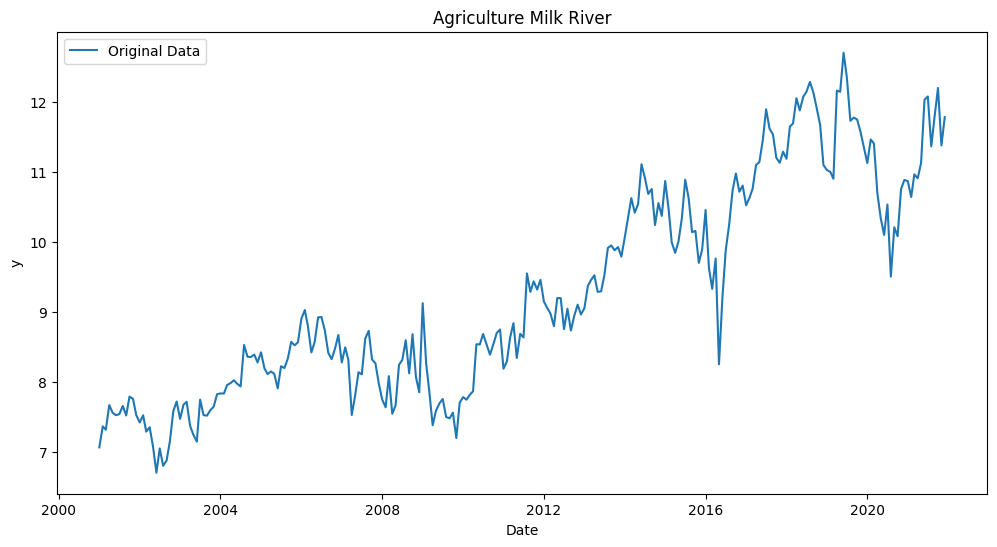

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_agriculture_Milkriver.index, lstm_agriculture_Milkriver['Agriculture'], label='Original Data')
plt.title('Agriculture Milk River')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

In [41]:
#Scaling the data
scaler = MinMaxScaler()
lstm_agriculture_Milkriver[['Agriculture']] = scaler.fit_transform(lstm_agriculture_Milkriver[['Agriculture']])
#Split the data - we split the data in 80-20 which means 80 is for training and 20 is for testing
train_size = int(len(lstm_agriculture_Milkriver) * 0.8)
train, test = lstm_agriculture_Milkriver[:train_size], lstm_agriculture_Milkriver[train_size:]

def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 10  # Adjust based on your data

X_train, y_train = create_sequences(train['Agriculture'].values, sequence_length)
X_test, y_test = create_sequences(test['Agriculture'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

2/2 [==============================] - 0s 6ms/step


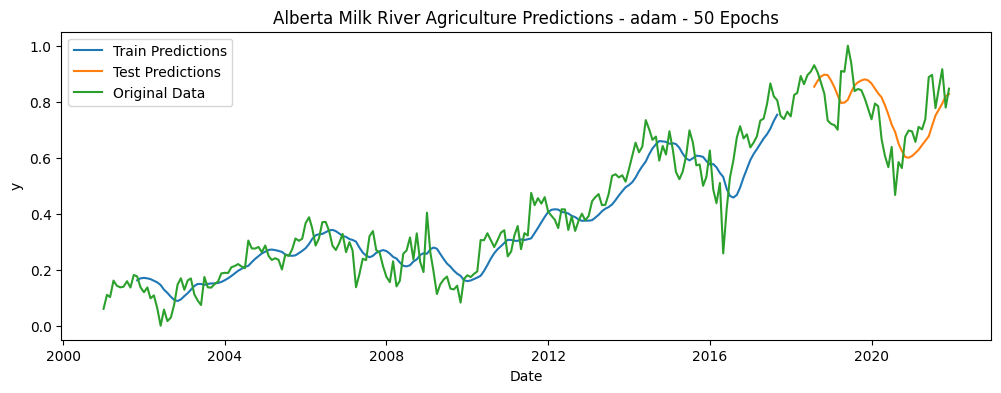

Metrics for adam - 50 Epochs:
Train MSE: 0.06420019229619545
Test MSE: 0.023467716674762672
Train MAE: 0.057436804851612774
Test MAE: 0.09548271201254156
Train RMSE: 0.07253887091564912
Test RMSE: 0.11094315338663403
2/2 [==============================] - 0s 6ms/step


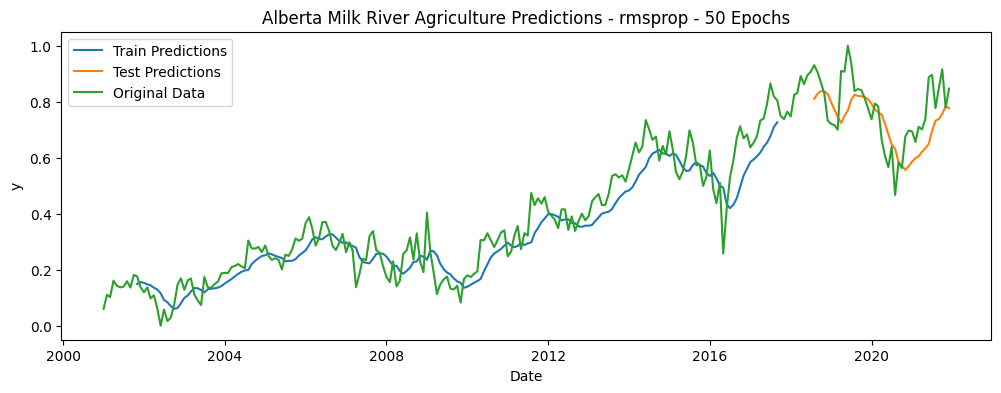

Metrics for rmsprop - 50 Epochs:
Train MSE: 0.06369131058675664
Test MSE: 0.023561095535338774
Train MAE: 0.05766879654025846
Test MAE: 0.08413127643711459
Train RMSE: 0.07299379419728452
Test RMSE: 0.1055265370844837
2/2 [==============================] - 0s 6ms/step


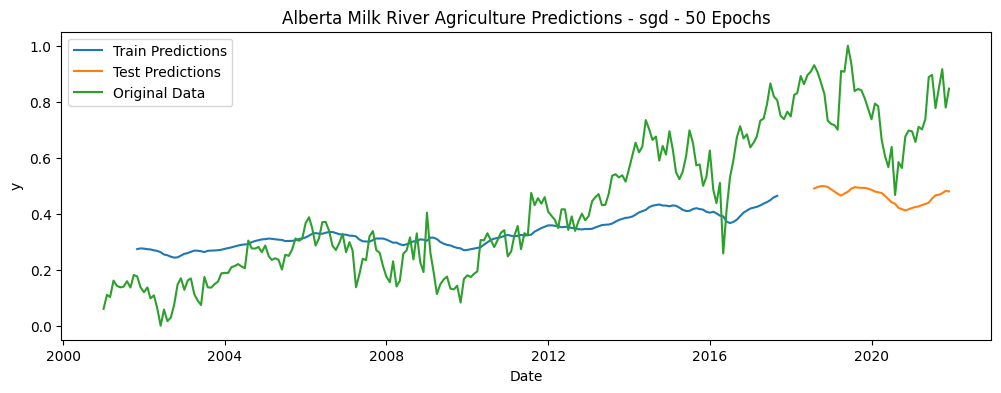

Metrics for sgd - 50 Epochs:
Train MSE: 0.03990865560593128
Test MSE: 0.10701965998358344
Train MAE: 0.1139284468692681
Test MAE: 0.303578138784977
Train RMSE: 0.14299080249370597
Test RMSE: 0.3212666077882025
2/2 [==============================] - 0s 6ms/step


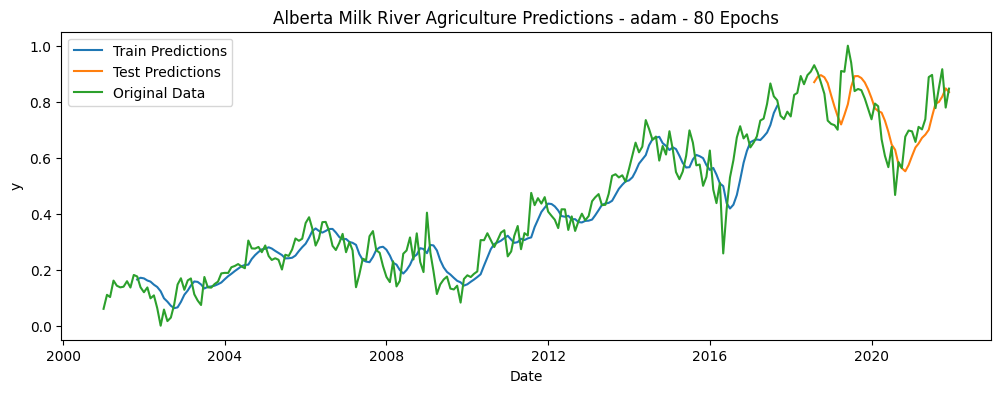

Metrics for adam - 80 Epochs:
Train MSE: 0.0659649203331554
Test MSE: 0.024837576667956364
Train MAE: 0.049864153919197865
Test MAE: 0.0765839627183944
Train RMSE: 0.06475525785776215
Test RMSE: 0.09418376353374418
2/2 [==============================] - 0s 6ms/step


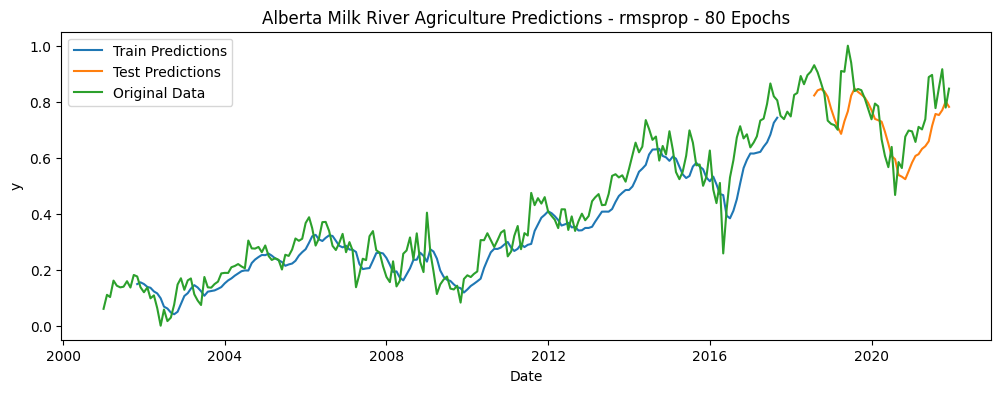

Metrics for rmsprop - 80 Epochs:
Train MSE: 0.06495162320703496
Test MSE: 0.02595302316064879
Train MAE: 0.05553452113202103
Test MAE: 0.08001336870441927
Train RMSE: 0.07102528385714654
Test RMSE: 0.10224899633715544
2/2 [==============================] - 0s 6ms/step


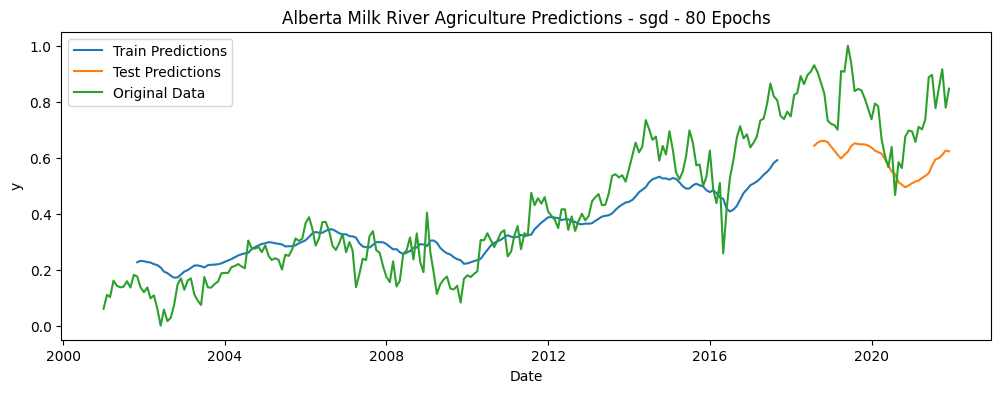

Metrics for sgd - 80 Epochs:
Train MSE: 0.04747348918510541
Test MSE: 0.04692360930067455
Train MAE: 0.07982173733877572
Test MAE: 0.17721542492895134
Train RMSE: 0.10157551814507947
Test RMSE: 0.19939726773088046
2/2 [==============================] - 0s 6ms/step


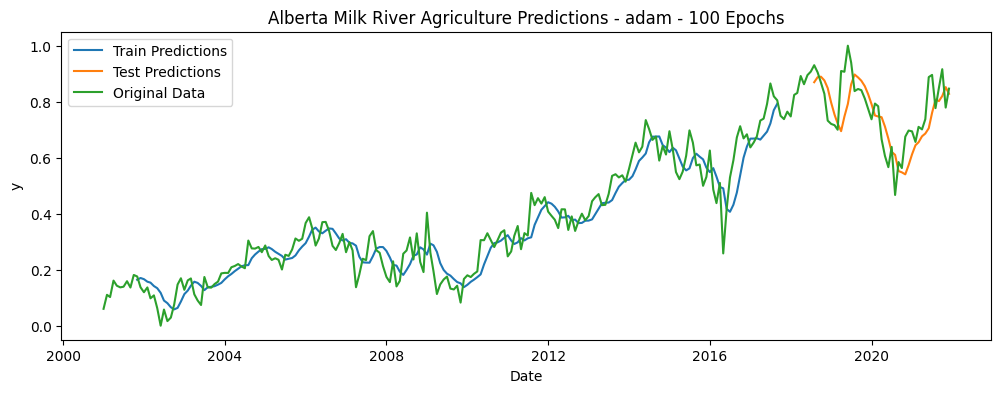

Metrics for adam - 100 Epochs:
Train MSE: 0.06658200117609574
Test MSE: 0.025413750186595096
Train MAE: 0.048342904406953456
Test MAE: 0.07280529558935675
Train RMSE: 0.06273543393811912
Test RMSE: 0.09001960918048155
2/2 [==============================] - 0s 7ms/step


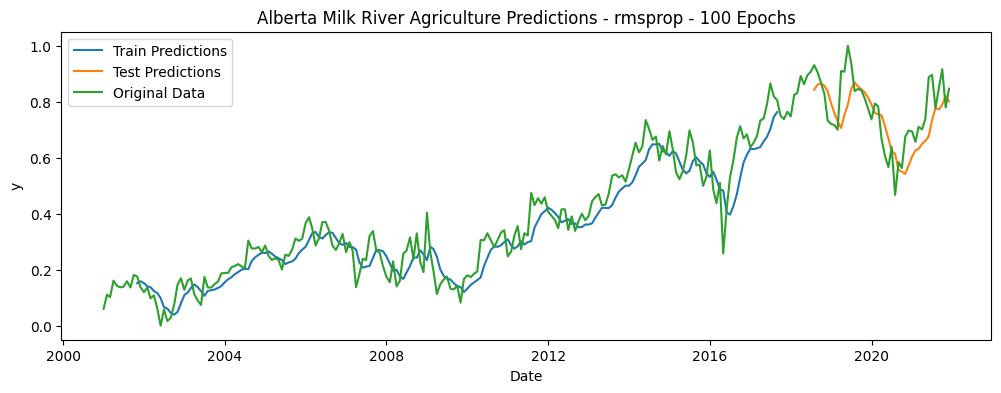

Metrics for rmsprop - 100 Epochs:
Train MSE: 0.06625570889689408
Test MSE: 0.024479809197029002
Train MAE: 0.0511257050066829
Test MAE: 0.0742335422107577
Train RMSE: 0.06567247096660528
Test RMSE: 0.09388877060784785
2/2 [==============================] - 0s 6ms/step


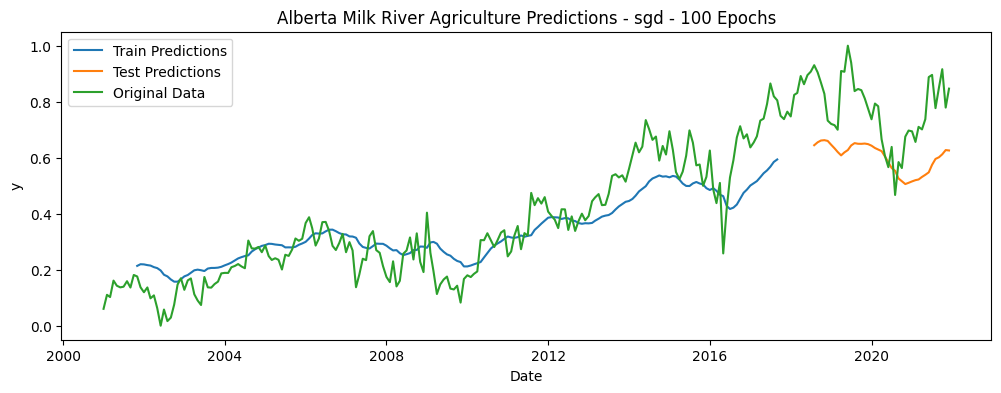

Metrics for sgd - 100 Epochs:
Train MSE: 0.048827953641826294
Test MSE: 0.044693368095039
Train MAE: 0.0762548016142503
Test MAE: 0.1723465918988089
Train RMSE: 0.09828984173739275
Test RMSE: 0.19529118737832457
2/2 [==============================] - 0s 5ms/step


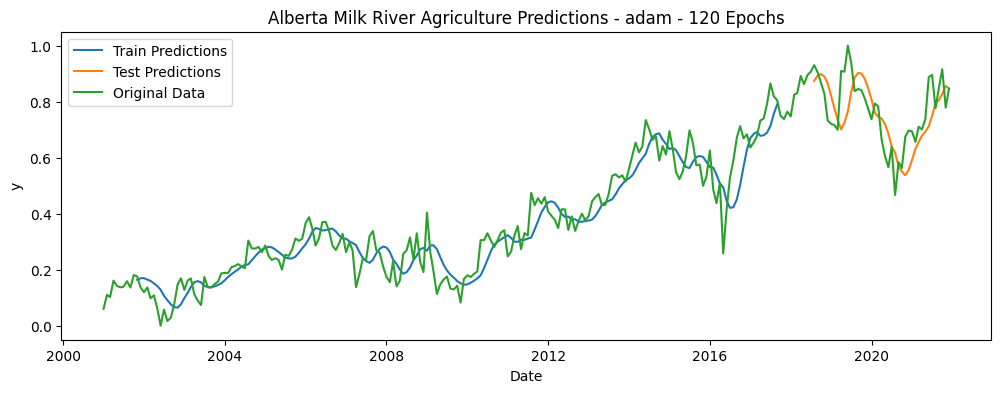

Metrics for adam - 120 Epochs:
Train MSE: 0.06653416118859416
Test MSE: 0.02600380011517703
Train MAE: 0.051782323924266106
Test MAE: 0.07892497009282536
Train RMSE: 0.06690467635859321
Test RMSE: 0.09762698522731461
2/2 [==============================] - 0s 6ms/step


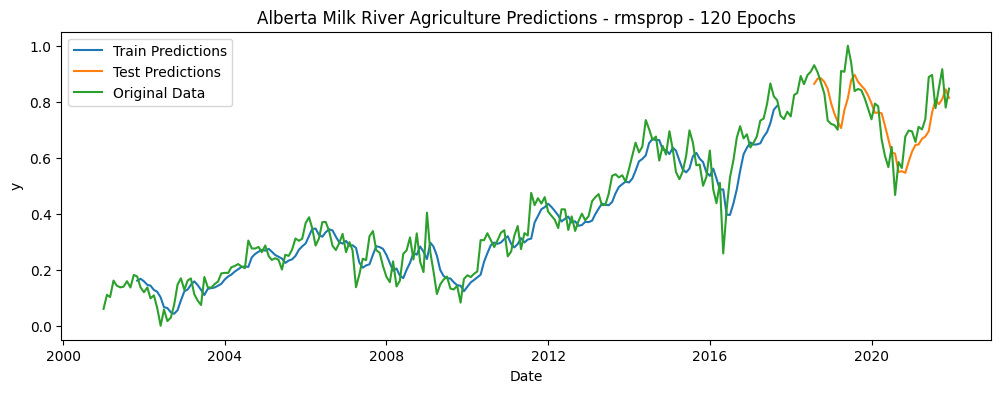

Metrics for rmsprop - 120 Epochs:
Train MSE: 0.06693452908327169
Test MSE: 0.024837136353010342
Train MAE: 0.0471624748240698
Test MAE: 0.07084058838923661
Train RMSE: 0.06118652579417901
Test RMSE: 0.08742017073416308
2/2 [==============================] - 0s 6ms/step


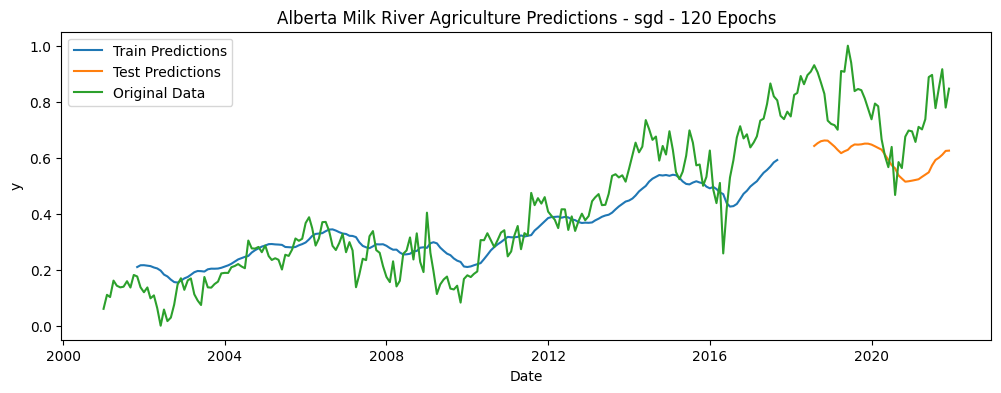

Metrics for sgd - 120 Epochs:
Train MSE: 0.04923377036208111
Test MSE: 0.043771931093257985
Train MAE: 0.07577319980451656
Test MAE: 0.1711483272310496
Train RMSE: 0.0980119049117651
Test RMSE: 0.19480300518005864


In [42]:
#Epoch applying
epochs_list = [50,80, 100, 120]
optimizers_list = ['adam','rmsprop','sgd' ]

#A new model is generated for every combination,
# and it is trained with training data (X_train and y_train) using the fit technique.

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

# The model is used to predict on both the training and testing sets after it has been trained.
# The scaler is then used to inversely translate the predictions back to the original scale.
# For visual aid purposes, the original data and the forecasts are shown together.

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        plt.figure(figsize=(12, 4))
        plt.plot(lstm_agriculture_Milkriver.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(lstm_agriculture_Milkriver.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(lstm_agriculture_Milkriver.index, lstm_agriculture_Milkriver['Agriculture'], label='Original Data')
        plt.title(f'Alberta Milk River Agriculture Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('y')
        plt.legend()
        plt.show()

        train_mae = mean_absolute_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:])
        test_mae = mean_absolute_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:])
        
        train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_predictions), train['Agriculture'].values[sequence_length:]))
        test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_predictions), test['Agriculture'].values[sequence_length:]))
     
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Agriculture'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Agriculture'].values[sequence_length:]))
        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Test RMSE: {test_rmse}')